In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# ImageDataGenerator - Data Augmentation Package
from keras.utils import img_to_array, array_to_img, load_img

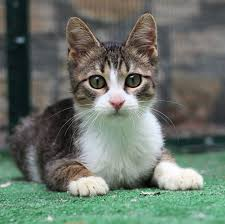

In [3]:
#Load the image for Data Augmentation purpose
image_file = '/content/cat_image.jpeg'
cat_image = tf.keras.preprocessing.image.load_img(image_file)
cat_image

In [4]:
cat_image_array = keras.preprocessing.image.img_to_array(cat_image)
cat_image_array

array([[[100.,  99.,  94.],
        [ 94.,  95.,  89.],
        [ 88.,  88.,  86.],
        ...,
        [ 96.,  96.,  96.],
        [ 97.,  96.,  94.],
        [102.,  98.,  95.]],

       [[100.,  99.,  94.],
        [ 94.,  95.,  89.],
        [ 87.,  88.,  83.],
        ...,
        [ 92.,  92.,  92.],
        [ 93.,  92.,  90.],
        [ 96.,  92.,  89.]],

       [[101., 100.,  95.],
        [ 95.,  96.,  90.],
        [ 88.,  89.,  84.],
        ...,
        [ 85.,  85.,  85.],
        [ 85.,  85.,  85.],
        [ 85.,  84.,  82.]],

       ...,

       [[100., 169., 124.],
        [ 95., 164., 119.],
        [ 84., 153., 108.],
        ...,
        [ 86., 157., 113.],
        [ 89., 158., 114.],
        [ 99., 163., 126.]],

       [[ 77., 149., 101.],
        [ 76., 148., 100.],
        [ 70., 139.,  94.],
        ...,
        [ 84., 153., 108.],
        [ 86., 155., 111.],
        [ 96., 160., 123.]],

       [[ 61., 133.,  85.],
        [ 67., 139.,  91.],
        [ 71., 1

In [5]:
# Apply data augmentation method
def plot_image(original_image, updated_image):
  plt.figure(figsize = (16,10))
  #original image
  plt.subplot(1,2,1)
  plt.title('Original_image')
  plt.imshow(original_image)

  #updated_image
  plt.subplot(1,2,2)
  plt.title('Updated_image')
  plt.imshow(updated_image)

  plt.show()

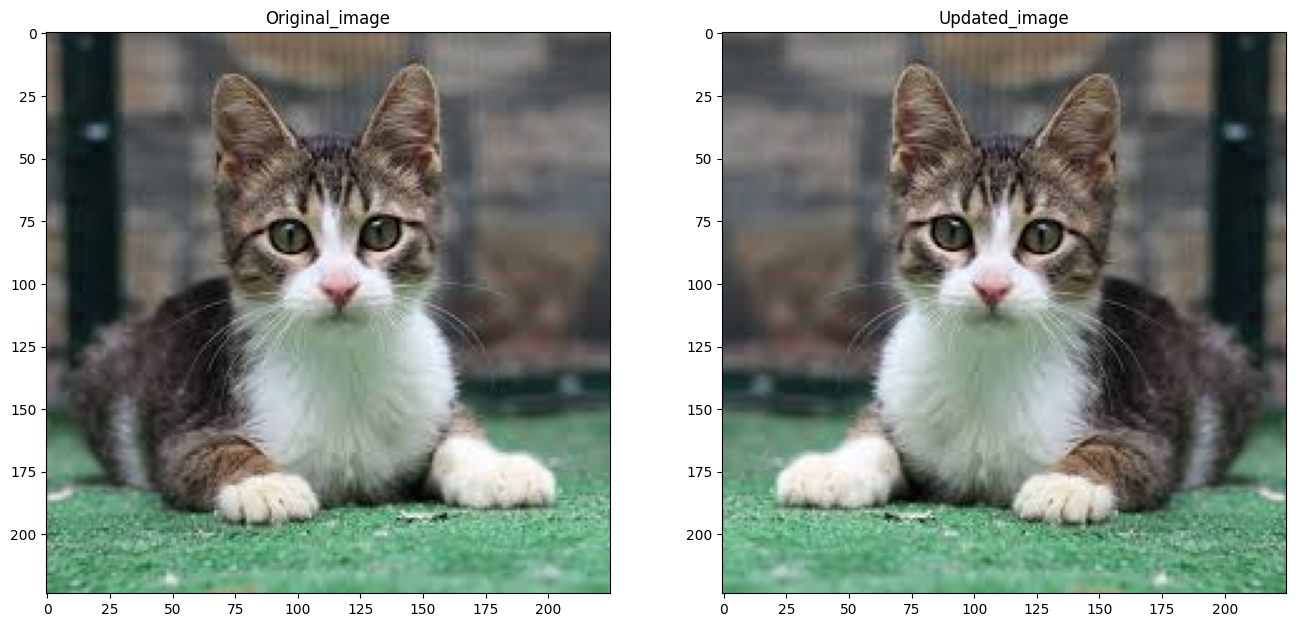

In [8]:
# use data augmenation method
# horizontal flip
updated_data = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip = True)
updated_array = updated_data.random_transform(cat_image_array)
updated_image = tf.keras.preprocessing.image.array_to_img(updated_array)
plot_image(cat_image, updated_image)

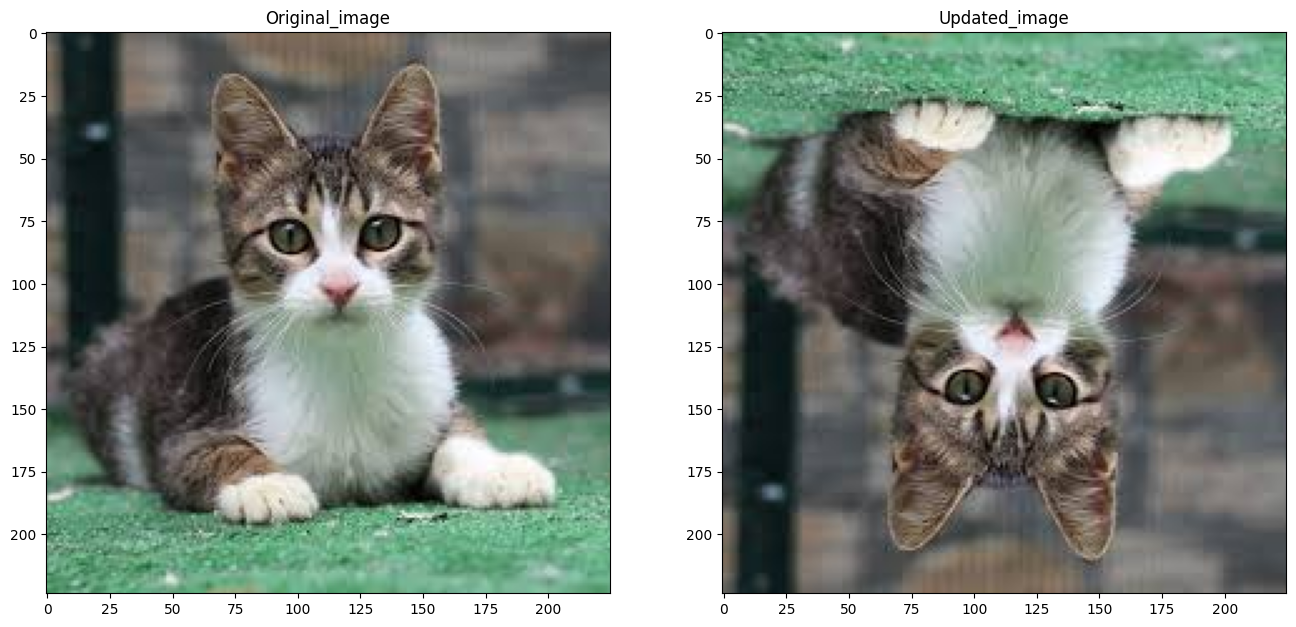

In [9]:
# Vertical flip
updated_data = tf.keras.preprocessing.image.ImageDataGenerator(vertical_flip = True)
updated_array = updated_data.random_transform(cat_image_array)
updated_image = tf.keras.preprocessing.image.array_to_img(updated_array)
plot_image(cat_image, updated_image)

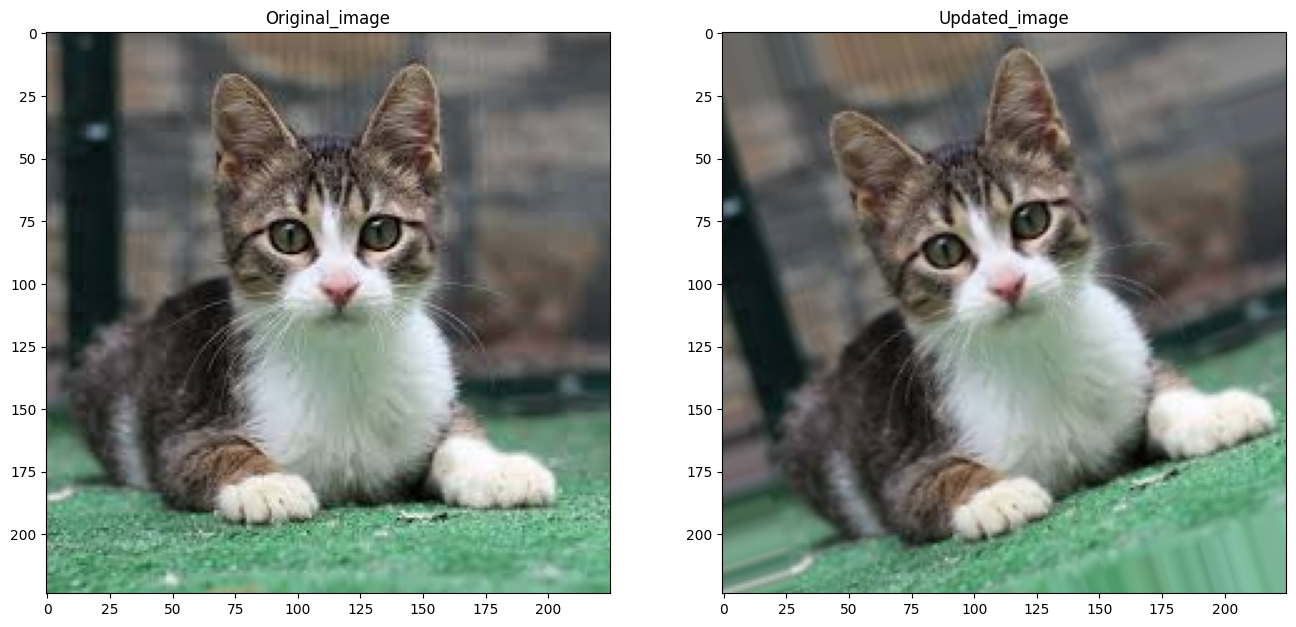

In [10]:
#Rotation
updated_data = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range = 30)
updated_array = updated_data.random_transform(cat_image_array)
updated_image = tf.keras.preprocessing.image.array_to_img(updated_array)
plot_image(cat_image, updated_image)

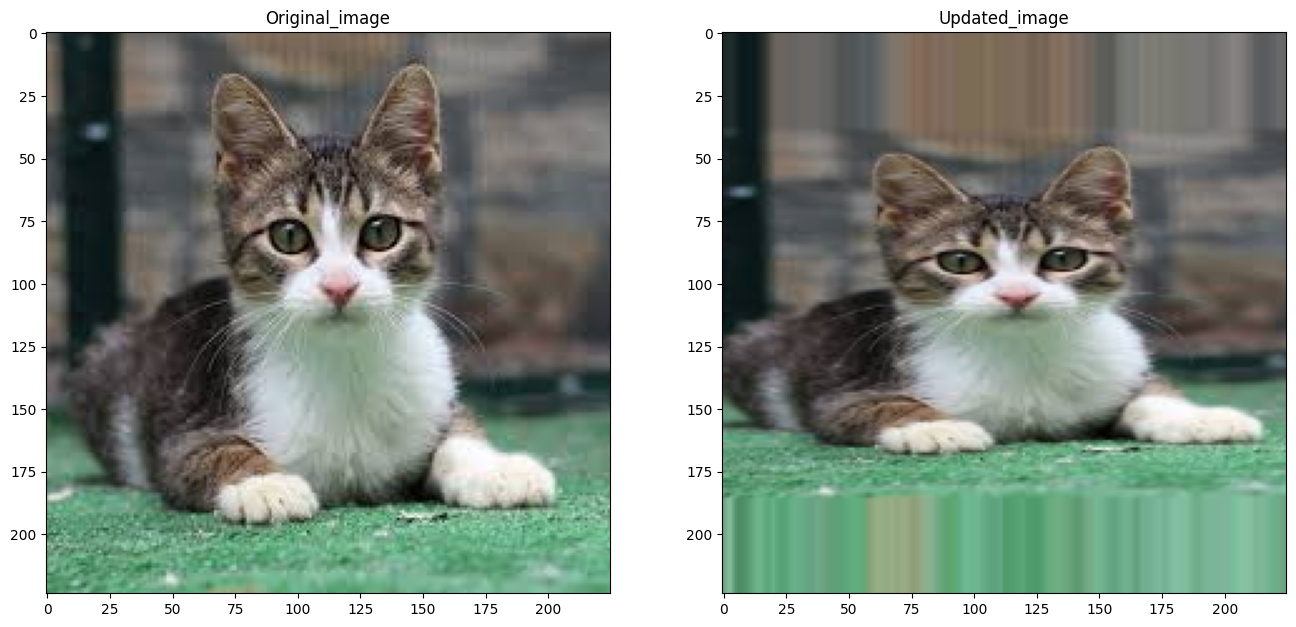

In [15]:
#zoom out
updated_data = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range = [0.4, 1.6])
updated_array = updated_data.random_transform(cat_image_array)
updated_image = tf.keras.preprocessing.image.array_to_img(updated_array)
plot_image(cat_image, updated_image)

In [16]:
dataset = tf.keras.preprocessing.image.ImageDataGenerator(featurewise_center=True, samplewise_center=True,
                                                          featurewise_std_normalization=True, samplewise_std_normalization=True,
                                                          zca_whitening=True, zca_epsilon=1e-06, rotation_range=15,
                                                          width_shift_range=0.2, height_shift_range=0.3, brightness_range=None,
                                                          shear_range=0.2, zoom_range=0.3, channel_shift_range=0.1,
                                                          fill_mode='nearest', cval=0.2, horizontal_flip=True,
                                                          vertical_flip=True, rescale=None, preprocessing_function=None,
                                                          data_format=None, validation_split=0.0, interpolation_order=1, dtype=None)

/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1054: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn(


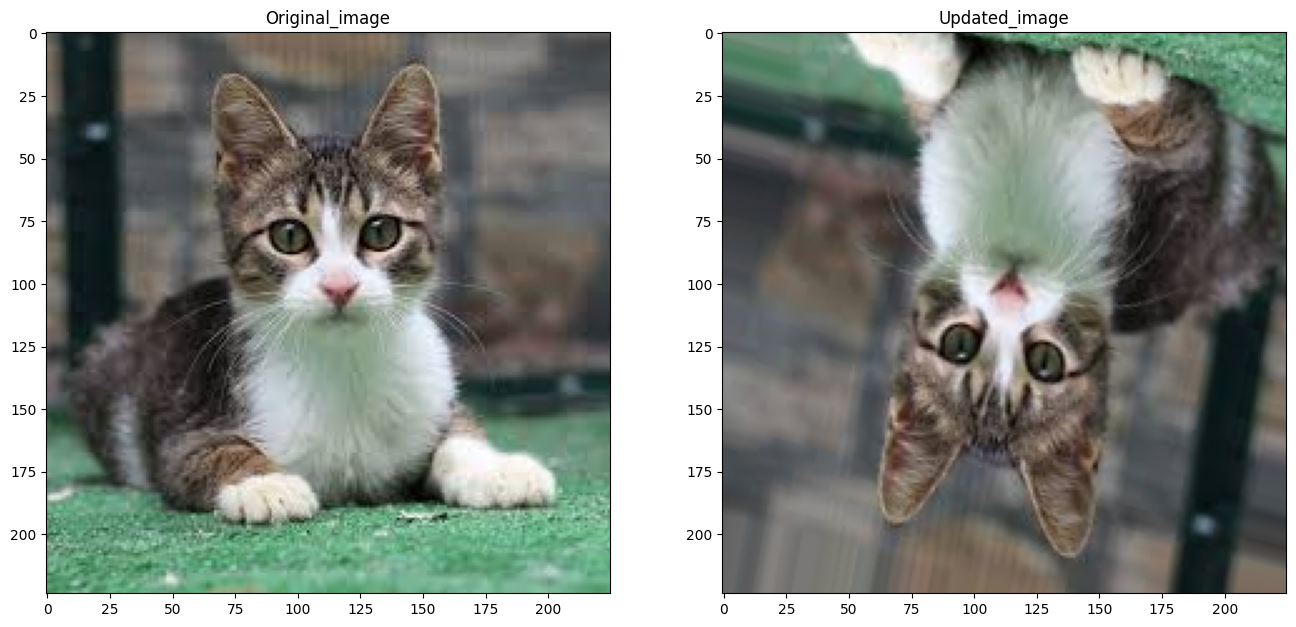

In [17]:
updated_array = dataset.random_transform(cat_image_array)
updated_image = tf.keras.preprocessing.image.array_to_img(updated_array)
plot_image(cat_image, updated_image)

In [18]:
cat_image_array.shape

(224, 225, 3)

In [19]:
cat_image_array_reshape = cat_image_array.reshape((1,) + cat_image_array.shape)
cat_image_array_reshape.shape

(1, 224, 225, 3)

In [21]:
directory = '/content/sample_data'
i = 0
for j in dataset.flow(cat_image_array_reshape, save_to_dir = directory, save_prefix = 'cat_image', save_format = '.jpeg'):
  i += 1
  if i > 100:
    break

/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1286: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


# Padding

In [23]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from keras.layers import Dense, Flatten, Conv2D
from keras import Sequential

In [24]:
(x_train,y_train), (x_test, y_test)= keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [25]:
x_train.shape

(60000, 28, 28)

In [ ]:
input_shape = (28,28,1)

In [26]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 22, 22, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,982,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,002,698 (7.64 MB)

 Trainable params: 2,002,698 (7.64 MB)

 Non-trainable params: 0 (0.00 B)